# 1. Introduction
American Community Survey (ACS) Public Use Microdata Sample (PUMS) shows a range of individual information on the US in separate years. Each year's worth of data is recorded in single rows of individuals which represents about one percent of the US population. It is assumed that the over a five-year period, year year's information should cover five percent of the US population.

The information collected covers features from each person such as weight, age, education, housing situation, children and parent status, and more. These areas are all coded to numerical values which out outlined in the data directory which includes all coded values. Full data and documentation can be located at at the [US Census Website](https://www.census.gov/programs-surveys/acs/technical-documentation/pums/documentation.html) for years readily available between 2005 and 2018.

The goal of this information is the accumulate the data from specified features to output a single score which reflects the wage difference between men and females while normalizing for age, education, industry, region, and race. While there are certainly difference between each subsection as to how large the difference is, this score looks to encapsulate the differences for the entire US.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statistics
import glob
import time

import ACS_analysis_pkg as acs
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Final Aanlysis

The first notebook overviewed the inital exploration of the dataset for each each and outlined the functions that would go into the final analysis. There are five variable observed {SEX, AGE, JOB, EDU, RACE} with multiple catagories within each variable. Each combination of catagories from each variable is refered to as a subset.All functions are stored in the ACS_anlaysis_pkg and overview the cleaning, modeling, transformation, and visualization of inital dataset from the ACS PUMS data. <br/>

**ACS_analysis_pkg:**

    (a) Parsing each raw dataset from each year (2008-2018)
    (b) Preprocessing the data to fit for modeling and transformation
    (c) Fitting a model for predicting wages for each catagory and variable
    (d) Transforming the dataset for final analysis and create dummy dataset
    (e) Quantifying difference between wages by normaizing across population
    (f) Visulazation of final output comparing catagories and variables

The function, yearly_multibase_analysis is used to parse through each of the specified year, preprocess, fit a model, transform a dummy dataset that contains every possible catagory combination, quantify difference between every variable and each catagory between them. The outputed datasets are summaired values with breakdown of data in multiple formats that are used for further visualization and possibly for futher analyais. For intermediate datasets, explore the ACS_analysis_pkg for for breakdown of each function.

In [3]:
#Output: grouped df with seperate analysis for each year
yearly_sex_sep, yearly_sex_full, yearly_cat_full, yearly_group_df = 
    acs.yearly_multibase_analysis(2008, 2018)

#Example: analysis on grouped set of years
#group_sex_sep, group_sex_full, group_cat_full = 
    #acs.multiyear_multibase_analysis(2014, 2018)

#Example: single year analysis
#year_sex_sep, year_sex_full, year_cat_full = 
    #acs.singleyear_multibase_analysis(2018)

Completed Year: 2008  (1.65 min)
Completed Year: 2009  (1.78 min)
Completed Year: 2010  (1.96 min)
Completed Year: 2011  (1.71 min)
Completed Year: 2012  (1.76 min)
Completed Year: 2013  (2.04 min)
Completed Year: 2014  (2.1 min)
Completed Year: 2015  (1.9 min)
Completed Year: 2016  (2.19 min)
Completed Year: 2017  (2.02 min)
Completed Year: 2018  (2.33 min)


In [12]:
yearly_sex_sep.to_csv('data_output\yearly_sex_sep.csv')
yearly_sex_full.to_csv('data_output\yearly_sex_full.csv')
yearly_cat_full.to_csv('data_output\yearly_cat_full.csv')
yearly_group_df.to_csv('data_output\yearly_group_df.csv')

In [11]:
yearly_sex_sep = pd.read_csv('data_output\yearly_sex_sep.csv')
yearly_sex_full = pd.read_csv('data_output\yearly_sex_full.csv')
yearly_cat_full = pd.read_csv('data_output\yearly_cat_full.csv')
yearly_group_df = pd.read_csv('data_output\yearly_group_df.csv')

# 3. Visulization

Below show...

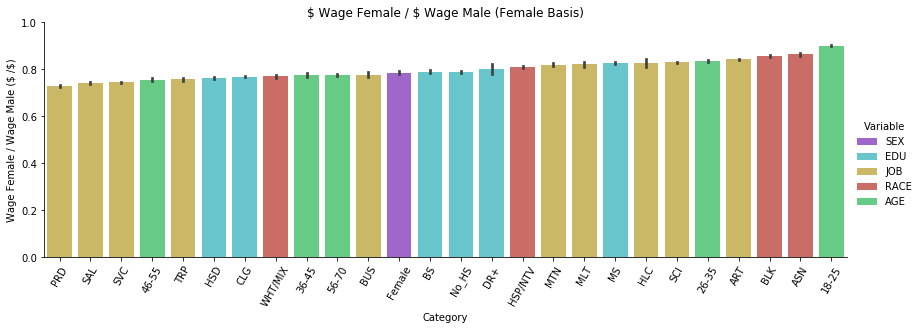

In [12]:
acs.plot_ratio_ordered(yearly_sex_full)

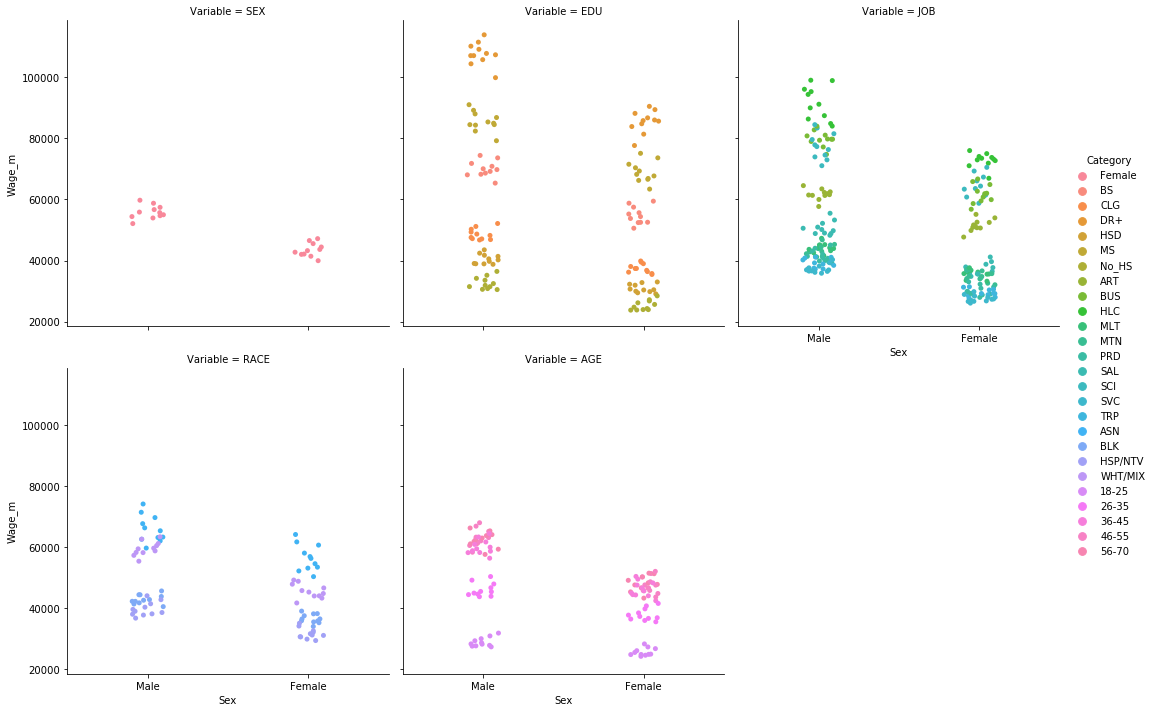

In [13]:
sns.catplot(y='Wage_m', x='Sex', hue='Category', col='Variable', col_wrap=3, data=yearly_sex_sep)

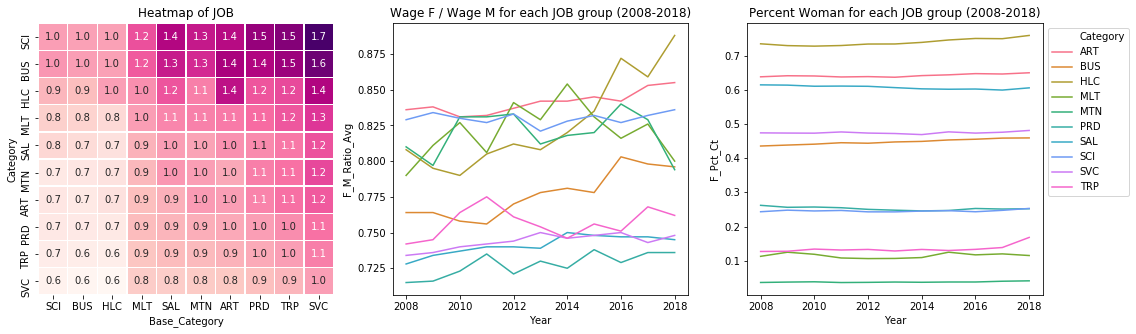

In [14]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'JOB')

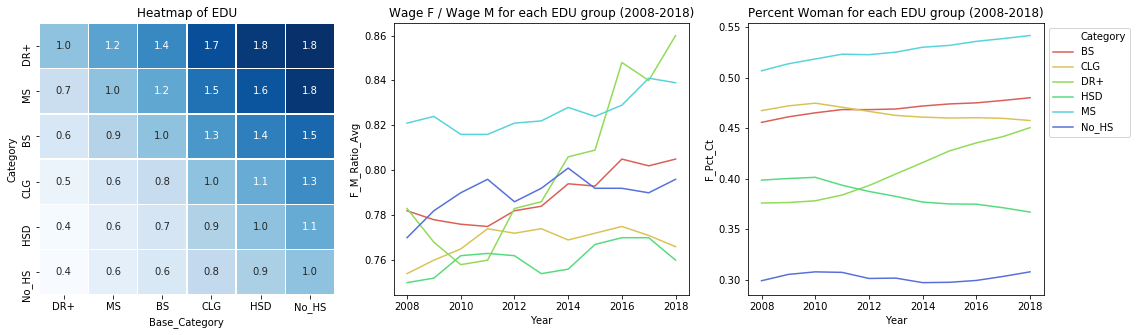

In [15]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'EDU')

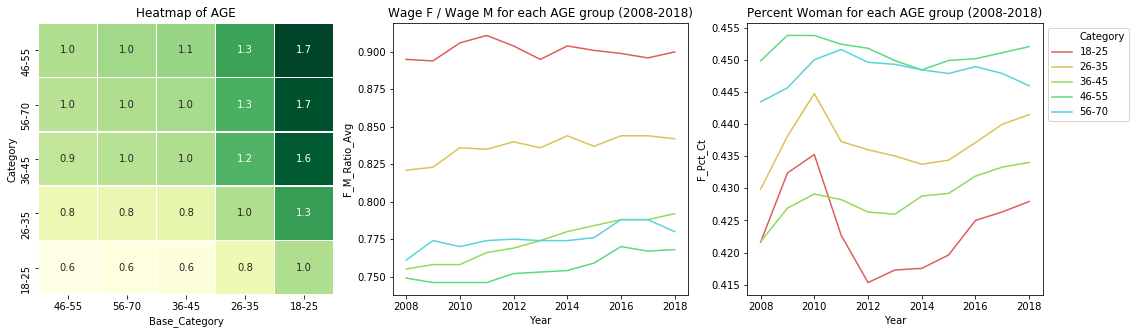

In [16]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'AGE')

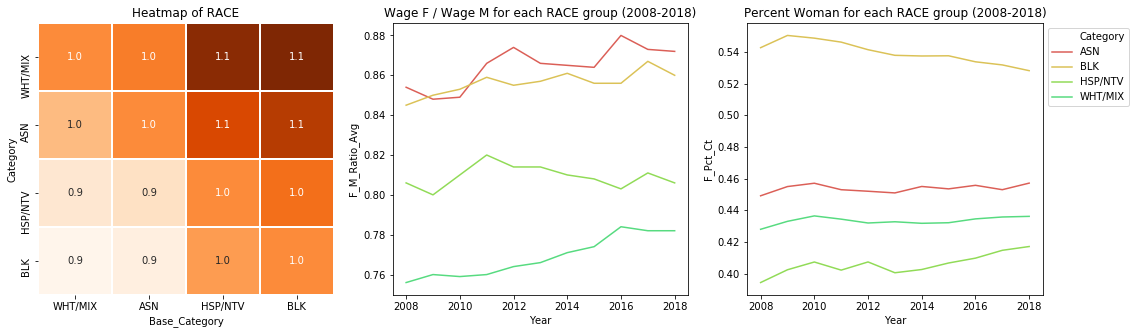

In [17]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'RACE')

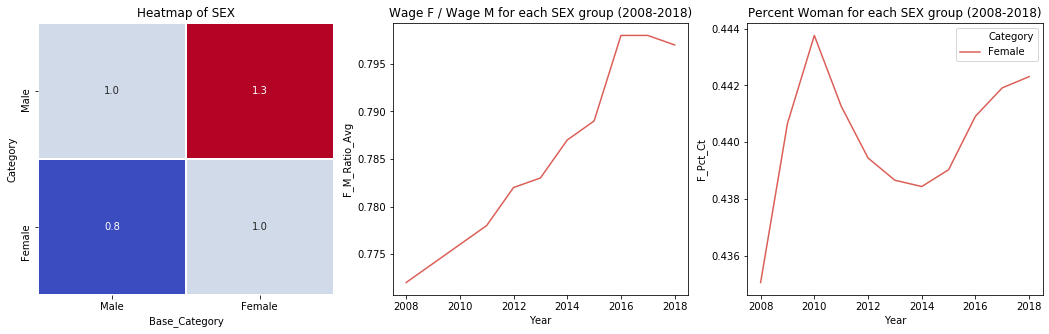

In [18]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'SEX')